# King County Housing Data
### A Breakdown of Leading Sale Price Variables

Seamus Walsh and Daniel Gieseke | June 2, 2023

King County, Washington boasts a dynamic real estate market with a variety of homes.  With this project we took in data on homes sold within King County to understand which home features affect sale price.  We not only included data from homes sold in the county, but included data on population, income, and geographic distances from select county features.  Our aim with this project is to create a predictive model that will tell potential home buyers or home value assesors a predicted value of a home based on select features of a home.

## Importing Our Modules and Inital Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import sklearn
import scipy
import statsmodels.api as sm
from scipy import stats
from geopy import distance
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

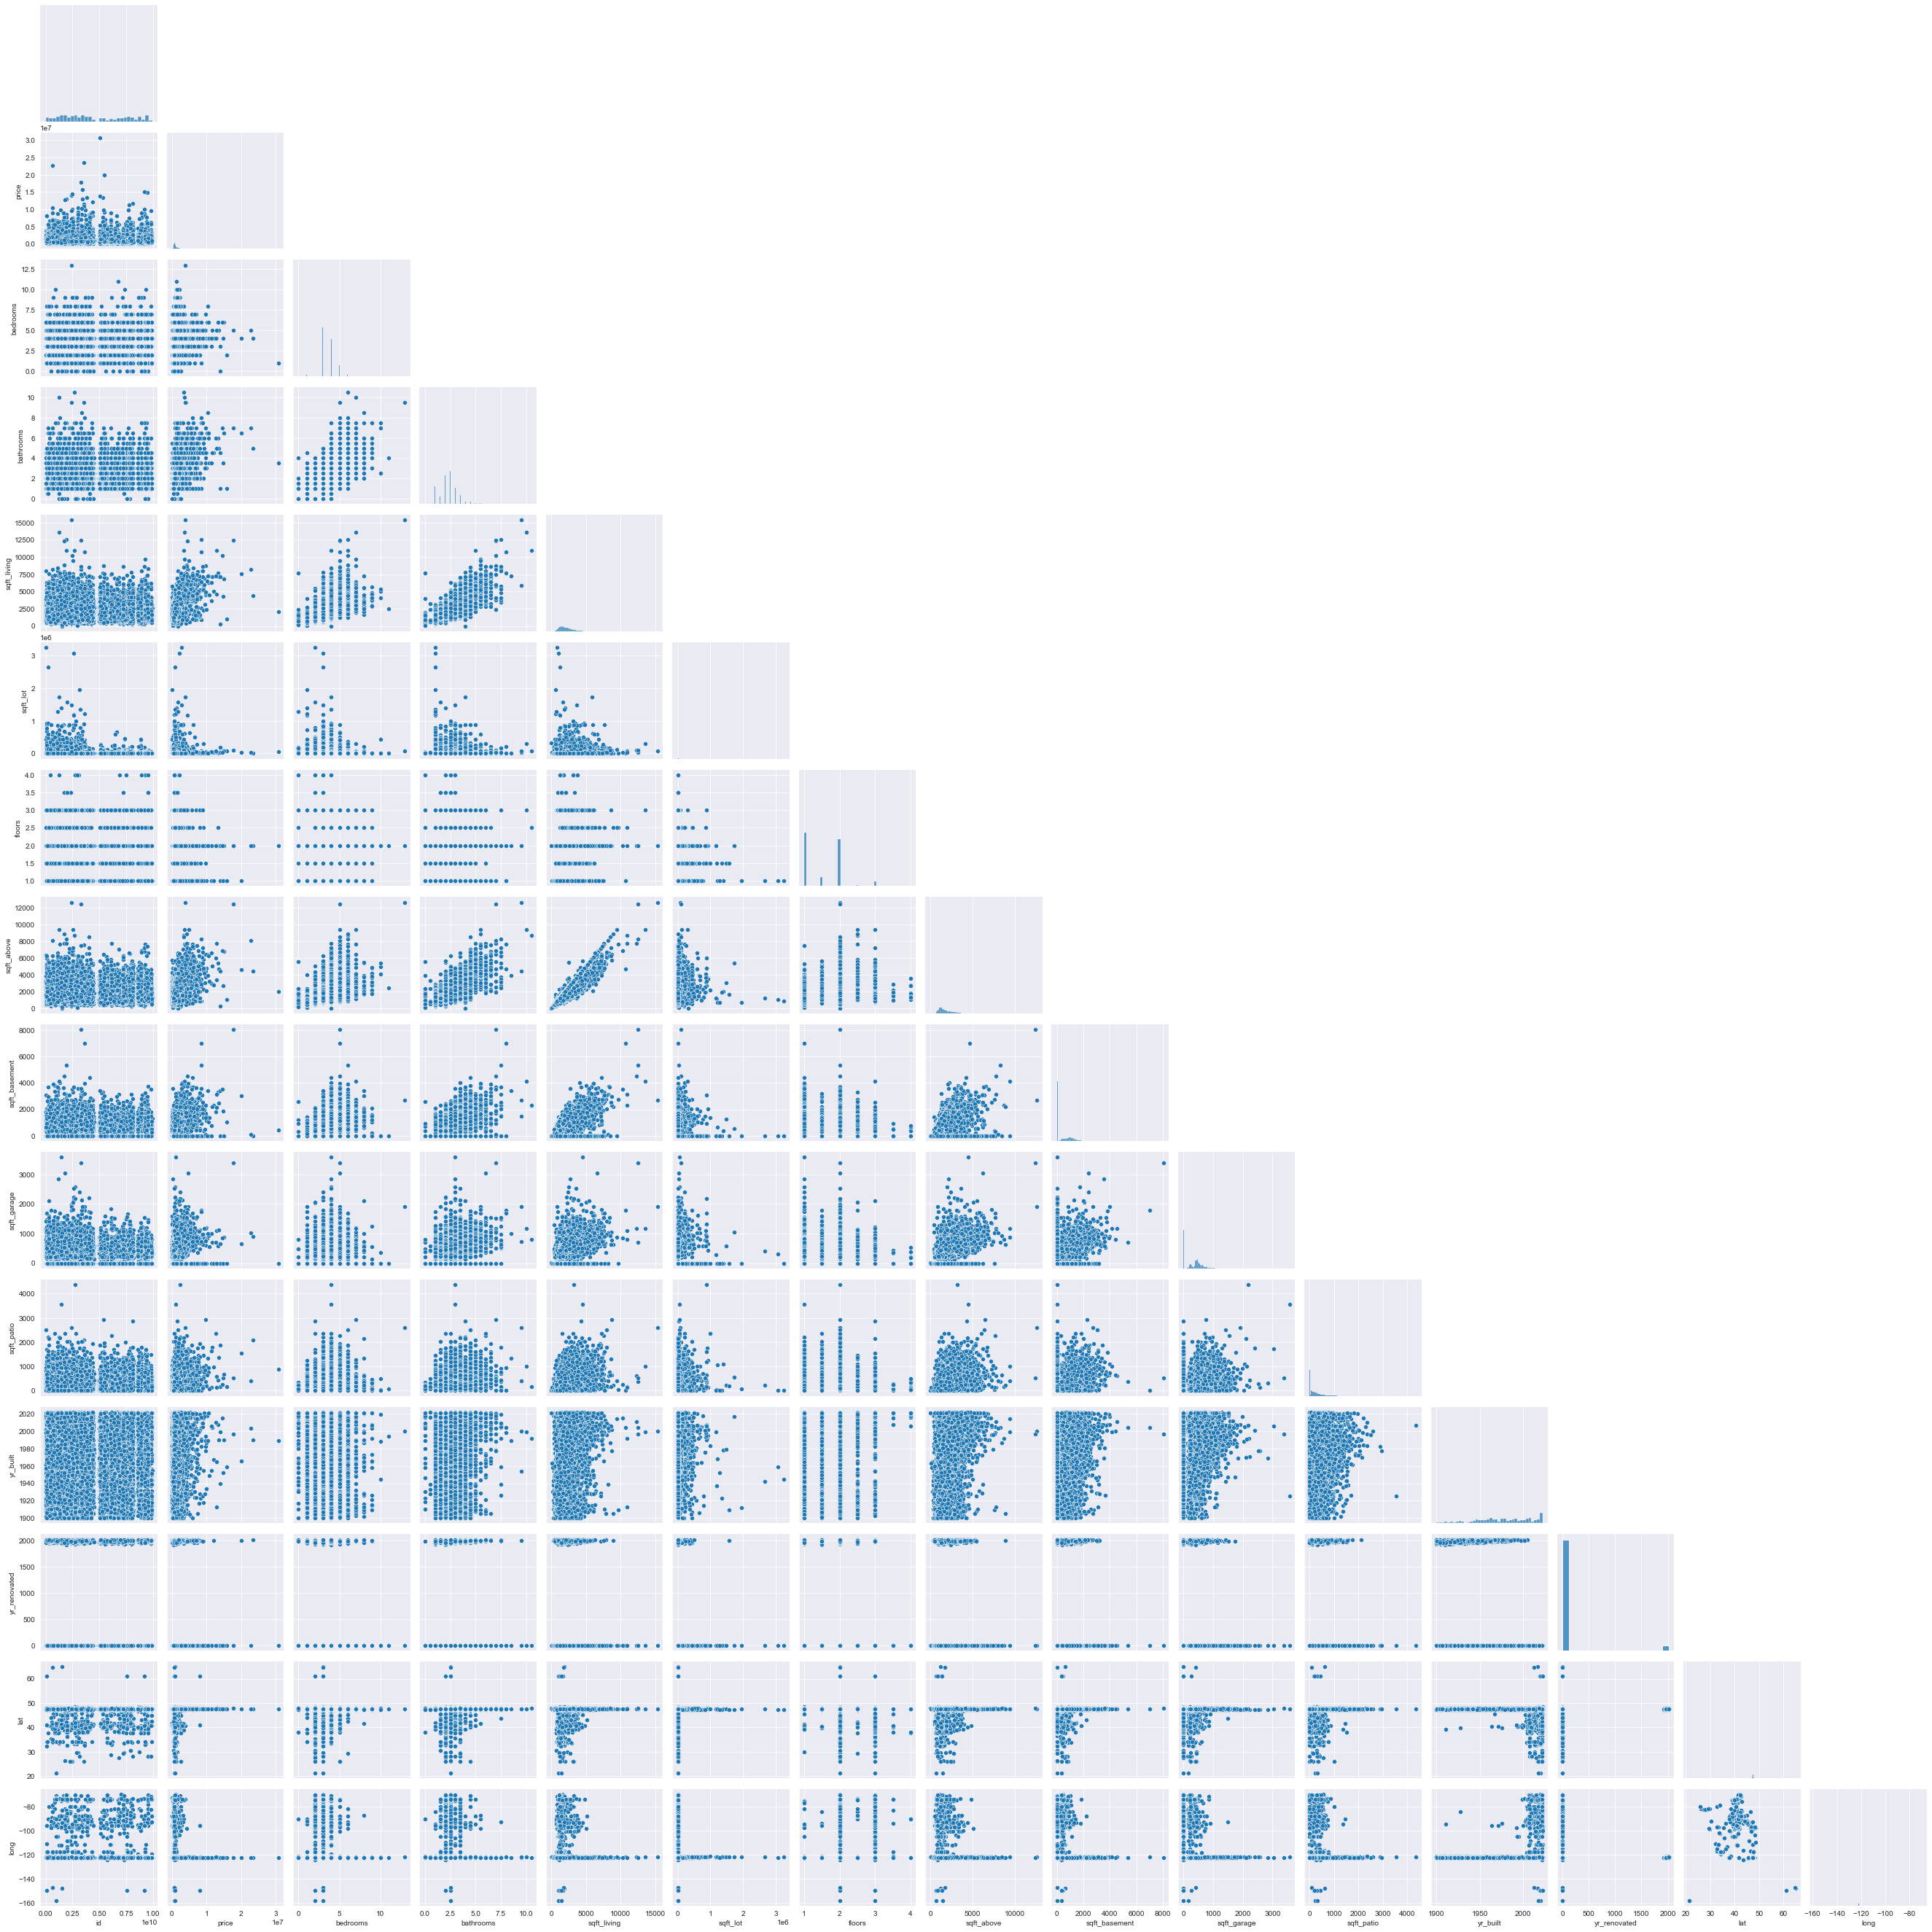

In [6]:
sns.pairplot(df, corner = True);

## Cleaning and Preparing our Data

**Removing Outliers in Our Data**

We noticed large outliers in our data through looking at the ".describe()" information outlied above.  We are opting to remove houses where the sale price is more than 3 standard deviations above our mean.  After we cleaned this column, we see that we have a healthier distribution in our 'price' column.  This will enable us to create a more effective predictive model of home prices in King County.

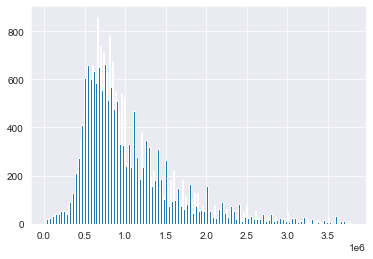

In [7]:
# Cleaning our data
df_sorted = df.sort_values(by='price', ascending=False)
df.drop(df[df['price'] >= 3797691].index, inplace = True)

# Plotting our data
plt.hist(df['price'], bins = 200)
plt.show()

**Creating New Columns for Categorical and Ordinal Data**

Below we are cleaning columns with categorical and ordinal data such that the values in these columns are either turned into dummy variables or assigned a value based on the ordinal data.

In [8]:
df['waterfront'].value_counts()

NO     29302
YES      416
Name: waterfront, dtype: int64

In [9]:
df['waterfront'].replace(['NO', 'YES'], [0,1], inplace = True)

In [10]:
df['greenbelt'].value_counts()

NO     28961
YES      757
Name: greenbelt, dtype: int64

In [11]:
df['greenbelt'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [12]:
df['nuisance'].value_counts()

NO     24577
YES     5141
Name: nuisance, dtype: int64

In [13]:
df['nuisance'].replace(['NO', 'YES'], [0, 1], inplace = True)

In [14]:
df['view'].value_counts()

NONE         26395
AVERAGE       1849
GOOD           830
EXCELLENT      440
FAIR           204
Name: view, dtype: int64

In [15]:
df['view'].replace(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], [0, 1, 2, 3, 4], inplace = True)

In [16]:
df['view'].value_counts()

0    26395
2     1849
3      830
4      440
1      204
Name: view, dtype: int64

In [17]:
df['condition'].value_counts()

Average      18225
Good          7971
Very Good     3228
Fair           230
Poor            64
Name: condition, dtype: int64

In [18]:
df['condition'].replace(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], [1, 2, 3, 4, 5], inplace = True)

In [19]:
df['condition'].value_counts()

3    18225
4     7971
5     3228
2      230
1       64
Name: condition, dtype: int64

In [20]:
df['grade'].value_counts()

7 Average        11688
8 Good            9369
9 Better          3744
6 Low Average     2847
10 Very Good      1271
5 Fair             390
11 Excellent       282
12 Luxury           56
4 Low               50
3 Poor              13
13 Mansion           4
1 Cabin              2
2 Substandard        2
Name: grade, dtype: int64

In [21]:
df['grade'].replace(['1 Cabin', '2 Substandard', '3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace = True)

**Removing Addresses Not in King County**

In reviewing the addresses in our data, we noticed a number of addresses that fell outside of King County, Washington.  Below we are cleaning out this data.  

In [22]:
df = df[df['address'].str.contains('98001|98002|98003|98004|98005|98006|98007|98008|98009|98010|98011|98013|98014|98015|98019|98022|98023|98024|98025|98027|98028|98029|98030|98031|98032|98033|98034|98035|98038|98039|98040|98041|98042|98045|98047|98050|98051|98052|98053|98054|98055|98056|98057|98058|98059|98062|98063|98064|98065|98068|98070|98071|98072|98073|98074|98075|98077|98083|98092|98093|98101|98102|98103|98104|98105|98106|98107|98108|98109|98111|98112|98114|98115|98116|98117|98118|98119|98121|98122|98124|98125|98126|98131|98132|98133|98134|98136|98138|98144|98145|98146|98148|98154|98155|98158|98160|98161|98164|98166|98168|98171|98174|98177|98178|98188|98198|98199|98224|98288')]

**Creating a Column that Identifies Zip Code**

In [23]:
zip_ = []
for add in df['address']:
    zip_.append(add[-20:-15])

df['zip'] = zip_

**Creating Column for "Year"**

Below we are creating a column for the year that a house was sold to see that relation to sale price.

In [24]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype(str).str[:4]
df['year'] = df['year'].astype(int)

**Creating Columns for Distance**

Below we are creating columns that account for a house's distance from certain locations.  We researched up and coming areas of Seattle and mapped out the distance of houses from these areas.  Additionally, we created a column for the distance from the Seattle central business district.

In [25]:
def distance_from(lat, long, series_lat, series_long):
    '''
    Creates a list with distances from the coordinate given by
    the first two arguments, to the coordinate given by the two
    second arguments.
    '''
    lat_long = series_lat.astype(str) + ',' + series_long.astype(str)
    lat_long = list(map(eval, lat_long))
    coordinates = (lat, long)
    miles = []
    for i in lat_long:
        miles.append(round(distance.distance(i, coordinates).miles, 1))
    return miles

In [26]:
df['distance_seattle'] = distance_from(47.6097, -122.3331, df['lat'], df['long'])
df['distance_bellvue'] = distance_from(47.6101, -122.2015, df['lat'], df['long'])
df['distance_kent'] = distance_from(47.3809, -122.2348, df['lat'], df['long'])
df['distance_federal_way'] = distance_from(47.3165, -122.3222, df['lat'], df['long'])
df['distance_bothell'] = distance_from(47.7601, -122.2054, df['lat'], df['long'])
df['distance_burien'] = distance_from(47.4704, -122.3468, df['lat'], df['long'])
df['distance_auburn'] = distance_from(47.3073, -122.2285, df['lat'], df['long'])
df['distance_renton'] = distance_from(47.4829, -122.2171, df['lat'], df['long'])
df['distance_redmond'] = distance_from(47.6740, -122.1215, df['lat'], df['long'])
df['distance_sammamish'] = distance_from(47.6114, -122.0357, df['lat'], df['long'])
df['distance_kirkland'] = distance_from(47.6777, -122.2060, df['lat'], df['long'])
df['distance_shoreline'] = distance_from(47.7565, -122.3422, df['lat'], df['long'])

**Adding Income and Population Data**

Below we are adding in information on median income and total population by zip code.  We sourced this data through the US Census Bureau via "Point2Homes.com"

*Source: https://www.point2homes.com/US/Neighborhood/WA/King-County-Demographics.html*

In [27]:
df2 = pd.read_csv('data/King County Pop Income Info.csv')
# Assign row as column headers
header_row = 0
df2.columns = df2.iloc[header_row]

# Convert row to column header using DataFrame.iloc[]
df2.columns = df2.iloc[0]

# Dropping first row
df2 = df2.iloc[1:]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 1 to 83
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nan                   0 non-null      float64
 1   ZipCode               83 non-null     object 
 2   Population            83 non-null     object 
 3   Number of Households  83 non-null     object 
 4   Median Income         83 non-null     object 
 5   Average Income        83 non-null     object 
 6   nan                   0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 4.7+ KB


In [28]:
df2 = df2.set_index('ZipCode')
df2['Median Income'] = df2['Median Income'].str.replace(',', '')
df2['Median Income'] = df2['Median Income'].str.replace('$', '')
df2['Median Income'] = df2['Median Income'].astype(float)
df2 = df2.dropna(axis=1)

# creating an index list from df2 that contains list of zip codes in our data
index_list = df2.index.values.tolist()

In [29]:
# creating row in df for the median income for the zip code - this is to see if the median income affects price
median_inc = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        median_inc.append(x['Median Income'])
    else:
        median_inc.append('NaN')

df['median_zip_income'] = median_inc
df['median_zip_income'] = df['median_zip_income'].astype(float)

In [30]:
# creating column in df for population by zip code - this is to see if the population of a zip code affects price
zip_pop = []

for zip_ in df['zip']:
    y = str(zip_)
    if y in index_list:
        x = df2.loc[y]
        zip_pop.append(x['Population'])
    else:
        zip_pop.append('NaN')

df['zip_population'] = zip_pop
df['zip_population'] = df['zip_population'].str.replace(',', '')
df['zip_population'] = df['zip_population'].astype(float)
df = df.dropna(axis=0)

**Creating Interaction Columns**

Below we are creating columns for variables that have similar affects on price based on the heatmap below.

In [45]:
df['sqft_living_grade'] = df['sqft_living'] * df['grade']
df['sqft_bath'] = df['sqft_living'] * df['bathrooms']
df['sqft_living_x_above'] = df['sqft_living'] * df['sqft_above']
df['inc_x_grade'] = df['median_zip_income'] * df['grade']

**Creating Column for Proximity to Whole Foods**

As we know Whole Foods Market is an indicator of the social status of certain neighborhoods, we are creating a column indicating if a house's zip code has a Whole Foods Market to see if this has an affect on home prices.

In [32]:
df['zip'] = df['zip'].astype(str)
zips_with_whole_foods = ['98116', '98122', '98119', '98121', '98115', '98034', '98004', '98052']
df['zip_has_wh'] = np.where(df['zip'].str.contains('98116|98122|98119|98121|98115|98034|98004|98052'), 1, 0)

## Exploring our Correlations

Now that we have cleaned our data, we are going to start exploring correlations that our various variables has with 'price'.  The goal of this exercise is to find variables that are highly correlated with price such that we can use these variables in a regression model to predict sale prices in King County.

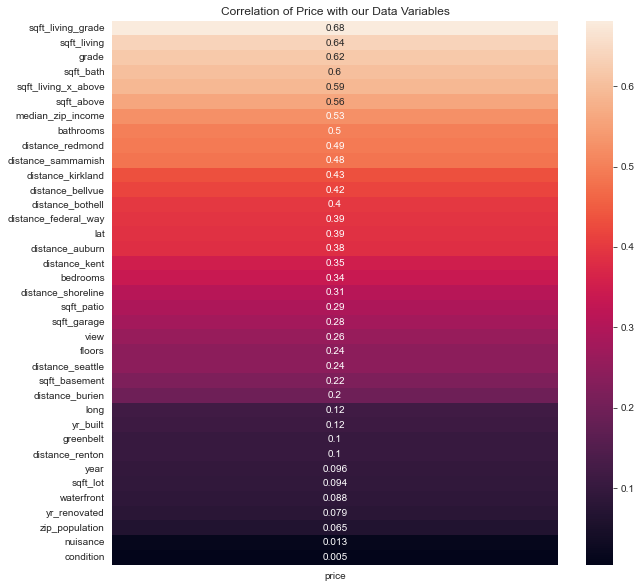

In [33]:
price_corr = df[df.columns[1:]].corr()['price'][:-1]
price_corr = pd.DataFrame(price_corr)
price_corr['price'] = price_corr['price'].abs()
price_corr  = price_corr.sort_values(by=['price'], ascending=False)
price_corr = price_corr.tail(-1)
price_corr
plt.figure(figsize=(10,10))
sns.heatmap(abs(price_corr), annot=True).set(title='Correlation of Price with our Data Variables');

**MODEL 1 - Square Feet Living Variable**

The first variable we are exploring is the 'sqft_living' variable as this variable has a high correlation with 'price.

In [34]:
X = df['sqft_living']
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.966e+04
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:54:29   Log-Likelihood:            -4.1550e+05
No. Observations:               28723   AIC:                         8.310e+05
Df Residuals:                   28721   BIC:                         8.310e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.536e+05   6914.061     22.222      0.000     1.4e+05    1.67e+05
sqft_living   425.4279      3.034    140.225      0.000     419.481     431.374
==============================================================================
Omnibus:                     5894.097   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18291.141
Skew:                           1.055   Prob(JB):                         0.00
Kurtosis:                       6.291   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Mean Absolute Error**

Below we are calculating the Mean Absolute error. We will compare this error to the mean absolute error of future models.

In [35]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = model.predict(sm.add_constant(X))
r2_1 = model.rsquared
mae1 = mae(y, y_pred)
mae1

338783.45035597915

**MODEL 2 - Adding More Variables to Our Model**

Below we are adding additional, price-correlated variables into our model.

In [36]:
X = df[['sqft_living', 'grade', 'bathrooms', 'bedrooms', 'sqft_above']]
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     5019.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:54:29   Log-Likelihood:            -4.1397e+05
No. Observations:               28723   AIC:                         8.280e+05
Df Residuals:                   28717   BIC:                         8.280e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.264e+05   2.33e+04    -35.536      0.000   -8.72e+05   -7.81e+05
sqft_living   352.8460      7.312     48.254      0.000     338.514     367.178
grade        1.869e+05   3587.243     52.104      0.000     1.8e+05    1.94e+05
bathrooms   -1.234e+04   4905.816     -2.514      0.012    -2.2e+04   -2719.461
bedrooms    -4.124e+04   3625.146    -11.375      0.000   -4.83e+04   -3.41e+04
sqft_above    -66.3446      6.570    -10.098      0.000     -79.223     -53.466
==============================================================================
Omnibus:                     6302.169   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21902.047
Skew:                           1.089   Prob(JB):                         0.00
Kurtosis:                       6.682   Cond. No.                     2.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Mean Absolute Error**

We see a decreasing mean absolute error with this model below.

In [37]:
y_pred = model.predict(sm.add_constant(X))
r2_2 = model.rsquared
mae2 = mae(y, y_pred)
mae2

320281.3860160106

**MODEL 3 - Adding External and Feature Engineered Variables**

Below we are adding additional, price-correlated variables into our model.  These variables are either from our external data sources or feature engineered through interactions.

In [48]:
X = df[['sqft_living', 'grade', 'sqft_living_grade', 'yr_renovated', 'sqft_above', 'sqft_basement', 'condition', 
        'floors', 'waterfront', 'view', 'year', 'median_zip_income', 'distance_shoreline', 
        'sqft_bath', 'sqft_living_x_above', 'zip_population', 'zip_has_wh','distance_seattle','distance_bellvue', 
        'distance_kent', 'distance_federal_way', 'distance_bothell', 'distance_burien', 'distance_auburn',
        'distance_renton', 'distance_redmond', 'distance_sammamish', 'distance_kirkland','distance_shoreline',
        'lat', 'sqft_lot', 'greenbelt']]
y = df['price']

In [49]:
model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     2845.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        17:00:20   Log-Likelihood:            -4.0282e+05
No. Observations:               28723   AIC:                         8.057e+05
Df Residuals:                   28691   BIC:                         8.060e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.428e+08      1e+07    -34.256      0.000   -3.62e+08   -3.23e+08
sqft_living           -362.3995     15.222    -23.808      0.000    -392.235    -332.564
grade                -5.455e+04   5025.994    -10.854      0.000   -6.44e+04   -4.47e+04
sqft_living_grade       69.4398      1.892     36.708      0.000      65.732      73.148
yr_renovated            54.9377      4.315     12.732      0.000      46.480      63.396
sqft_above             302.9922     10.067     30.098      0.000     283.261     322.724
sqft_basement           14.6794      6.197      2.369      0.018       2.534      26.825
condition             6.887e+04   2644.981     26.036      0.000    6.37e+04    7.41e+04
floors               -6.072e+04   4665.622    -13.014      0.000   -6.99e+04   -5.16e+04
waterfront            2.977e+05   1.64e+04     18.175      0.000    2.66e+05     3.3e+05
view                   6.83e+04   2479.122     27.551      0.000    6.34e+04    7.32e+04
year                    1.6e+05   3673.286     43.562      0.000    1.53e+05    1.67e+05
median_zip_income        3.0096      0.090     33.546      0.000       2.834       3.185
distance_shoreline    6670.0264    965.026      6.912      0.000    4778.531    8561.522
sqft_bath               14.9732      1.264     11.850      0.000      12.497      17.450
sqft_living_x_above     -0.0527      0.002    -26.247      0.000      -0.057      -0.049
zip_population          -2.1253      0.194    -10.964      0.000      -2.505      -1.745
zip_has_wh            2.795e+04   7079.406      3.948      0.000    1.41e+04    4.18e+04
distance_seattle       2.53e+04   2148.551     11.777      0.000    2.11e+04    2.95e+04
distance_bellvue     -9.692e+04   3762.467    -25.761      0.000   -1.04e+05   -8.96e+04
distance_kent        -1.364e+04   2986.057     -4.566      0.000   -1.95e+04   -7782.461
distance_federal_way -1.249e+04   1836.912     -6.800      0.000   -1.61e+04   -8890.909
distance_bothell      5.218e+04   2862.894     18.226      0.000    4.66e+04    5.78e+04
distance_burien       6486.8599   1873.908      3.462      0.001    2813.913    1.02e+04
distance_auburn       1.354e+04   2907.153      4.659      0.000    7844.931    1.92e+04
distance_renton       5.026e+04   2442.824     20.575      0.000    4.55e+04     5.5e+04
distance_redmond      3.978e+04   4263.285      9.332      0.000    3.14e+04    4.81e+04
distance_sammamish    1.983e+04   2078.264      9.540      0.000    1.58e+04    2.39e+04
distance_kirkland     -9.91e+04   4714.919    -21.018      0.000   -1.08e+05   -8.99e+04
distance_shoreline    6670.0264    965.026      6.912      0.000    4778.531    8561.522
lat                   4.048e+05   1.41e+05      2.866      0.004    1.28e+05    6.82e+05
sqft_lot                 0.4646      0.031     15.199    

**Mean Absolute Error**

Within our final model, we see a mean absolute error of $197,248, which shows a lot of progress from our earlier models with limited variables.

In [41]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = model.predict(sm.add_constant(X))
r2_3 = model.rsquared
mae3 = mae(y, y_pred)
mae3

197248.54810354172

In [42]:
df.to_csv('data/cleaned_data.csv')

### Interpreting Our Coefficients

**NOTE** This is an initial interpretation.  For the interpretation on our scaled coefficients, please see our "Testing the Model" notebook.

From our final model above, we see a few interesting variables that affect a home's sale price.  Firstly, we note the "Distance from Bellevue" and "Distance from Kirkland" variables have negative coefficients.  This tells us that as the distance from Bellevue and/or Kirkland increases, the home value decreases.  More simply put, this tells us that a greater proximity to these two cities increases the sale price of a home.  Secondly, we found the variable "zip_has_wh" to be interesting.  This coefficient tells us that if a home is in a zip code with a whole foods, the sale price of a home increases.  

The third feature we found interesting was the "median_zip_income" variable which adds a healthy amount of weight to our model from first glance.  In simplest terms, this tells us that the median income of a home's zip code times 3.0096 would be added as a weight to our prospective home sale price.  As the median income in a zip code increases, so does the home sale price.

### Mapping Out The Change in Our Mean Absolute Error and R-Squared

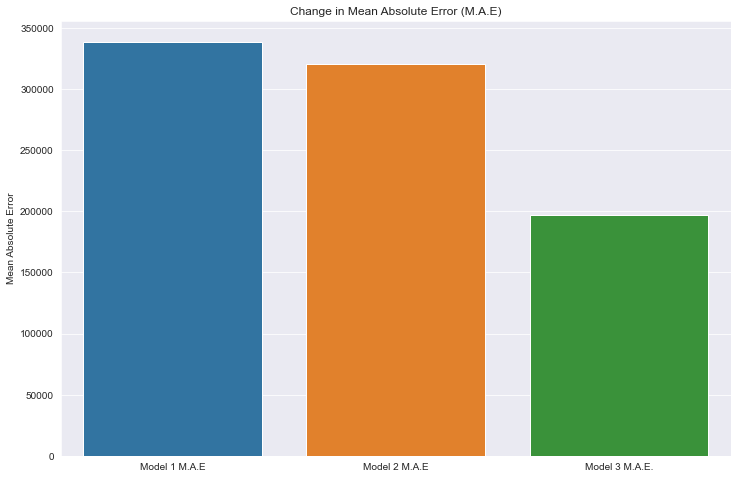

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
x1 = ['Model 1 M.A.E', 'Model 2 M.A.E', 'Model 3 M.A.E.']
y1 = [mae1, mae2, mae3]
sns.barplot(x=x1, y=y1).set(title='Change in Mean Absolute Error (M.A.E)')
ax.set_ylabel('Mean Absolute Error');

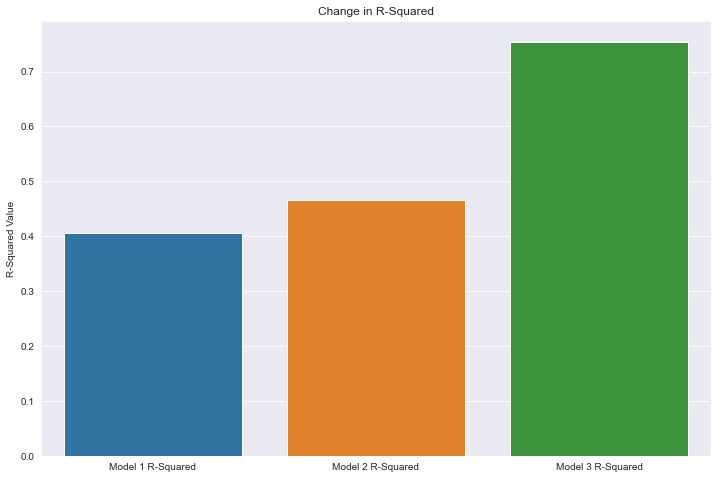

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
x2 = ['Model 1 R-Squared', 'Model 2 R-Squared', 'Model 3 R-Squared']
y2 = [r2_1, r2_2, r2_3]
sns.barplot(x=x2, y=y2).set(title='Change in R-Squared')
ax.set_ylabel('R-Squared Value');